In [2]:
#IMPORT THE LIBRARIES
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf


In [3]:
# to play the audio files
import IPython.display as ipd
from IPython.display import Audio
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD

from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
print ("Done")


Done


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#preparing data set

ravdess = "/content/drive/MyDrive/Colab Notebooks/RAVDESS/audio_speech_actors_01-24/"
ravdess_directory_list = os.listdir(ravdess)
print(ravdess_directory_list)

['Actor_24', 'Actor_20', 'Actor_23', 'Actor_21', 'Actor_22', 'Actor_19', 'Actor_17', 'Actor_15', 'Actor_14', 'Actor_10', 'Actor_16', 'Actor_18', 'Actor_11', 'Actor_13', 'Actor_12', 'Actor_05', 'Actor_06', 'Actor_08', 'Actor_04', 'Actor_09', 'Actor_02', 'Actor_01', 'Actor_03', 'Actor_07']


In [6]:
file_emotion = []
file_path = []
for i in ravdess_directory_list:
    # as their are 24 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(ravdess + i)
    for f in actor:
        part = f.split('.')[0].split('-')
    # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(ravdess + i + '/' + f)


In [7]:
print(actor[0])
print(part[0])
print(file_path[0])
print(int(part[2]))
print(f)

03-01-02-01-02-01-07.wav
03
/content/drive/MyDrive/Colab Notebooks/RAVDESS/audio_speech_actors_01-24/Actor_24/03-01-04-01-01-01-24.wav
8
03-01-08-02-02-02-07.wav


In [8]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
ravdess_df = pd.concat([emotion_df, path_df], axis=1)
# changing integers to actual emotions.
ravdess_df.Emotions.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust',
                             8:'surprise'},
                            inplace=True)
print(ravdess_df.head())
print("______________________________________________")
print(ravdess_df.tail())
print("_______________________________________________")
print(ravdess_df.Emotions.value_counts())

  Emotions                                               Path
0      sad  /content/drive/MyDrive/Colab Notebooks/RAVDESS...
1    happy  /content/drive/MyDrive/Colab Notebooks/RAVDESS...
2  neutral  /content/drive/MyDrive/Colab Notebooks/RAVDESS...
3    happy  /content/drive/MyDrive/Colab Notebooks/RAVDESS...
4  neutral  /content/drive/MyDrive/Colab Notebooks/RAVDESS...
______________________________________________
      Emotions                                               Path
1435   disgust  /content/drive/MyDrive/Colab Notebooks/RAVDESS...
1436   disgust  /content/drive/MyDrive/Colab Notebooks/RAVDESS...
1437  surprise  /content/drive/MyDrive/Colab Notebooks/RAVDESS...
1438      fear  /content/drive/MyDrive/Colab Notebooks/RAVDESS...
1439  surprise  /content/drive/MyDrive/Colab Notebooks/RAVDESS...
_______________________________________________
Emotions
neutral     288
sad         192
happy       192
fear        192
surprise    192
disgust     192
angry       192
Name: count, dty

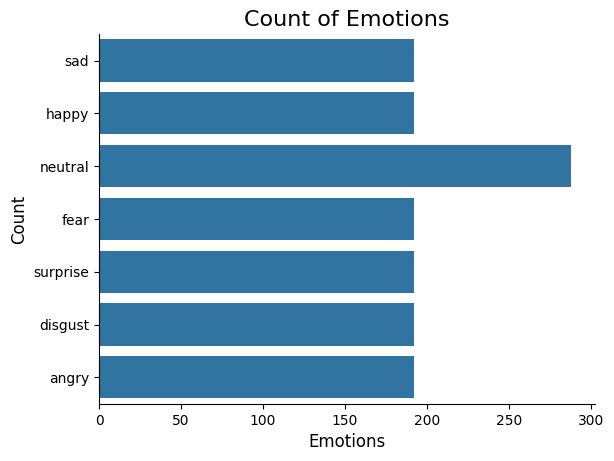

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('Count of Emotions', size=16)
sns.countplot(ravdess_df.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [10]:
data,sr = librosa.load(file_path[0])
sr

22050

In [11]:
ipd.Audio(data,rate=sr)

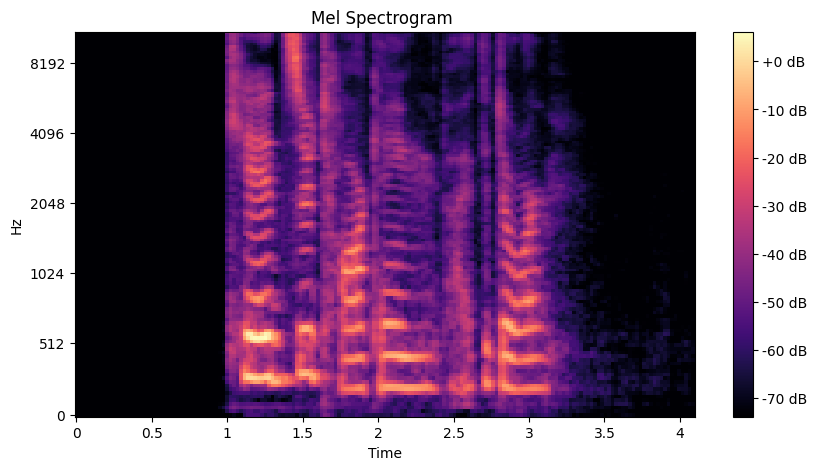

In [12]:
# CREATE LOG MEL SPECTROGRAM
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000)
log_spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, y_axis='mel', sr=sr, x_axis='time');
plt.title('Mel Spectrogram ')
plt.colorbar(format='%+2.0f dB');

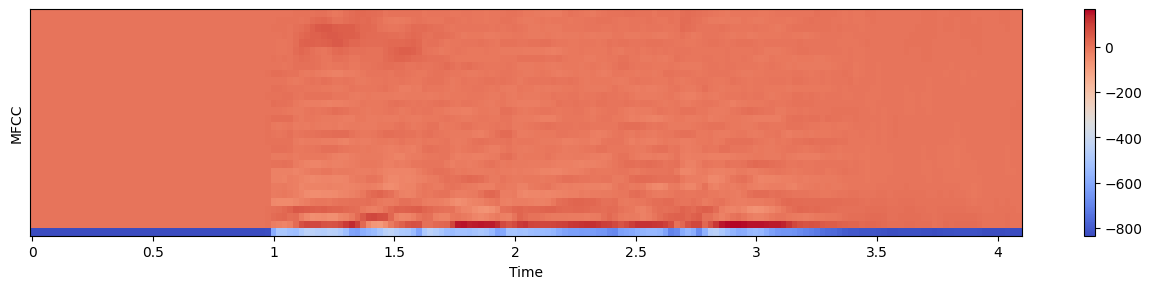

In [13]:
mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=30)


# MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(data,rate=sr)

In [14]:
# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

# STRETCH
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)
# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
# PITCH
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

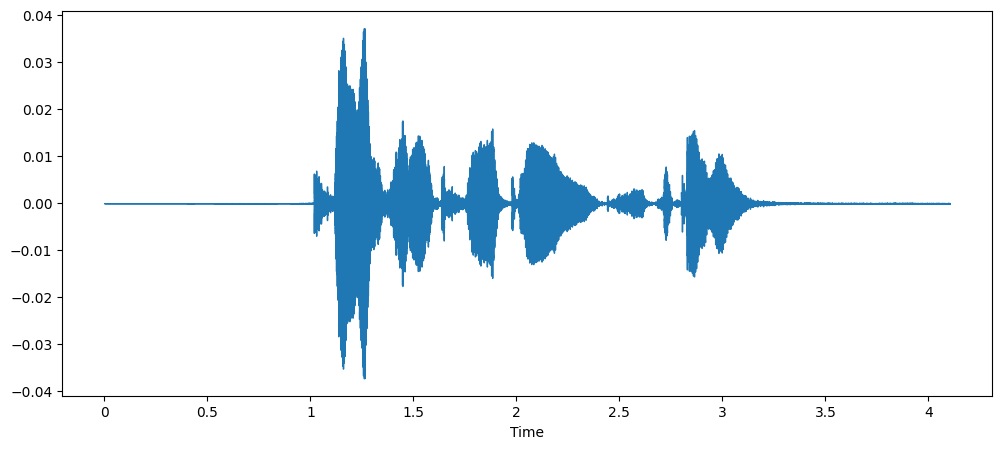

In [15]:
# NORMAL AUDIO


import librosa.display
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sr)
ipd.Audio(data,rate=sr)


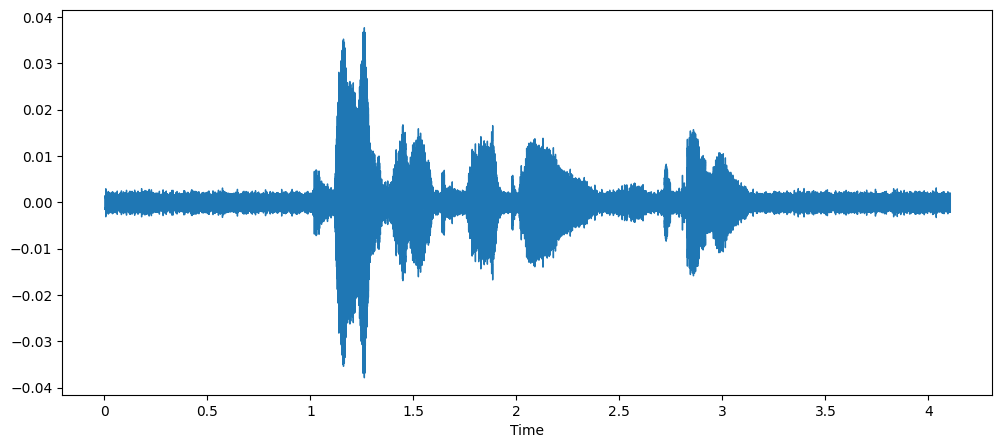

In [16]:
# AUDIO WITH NOISE
x = noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

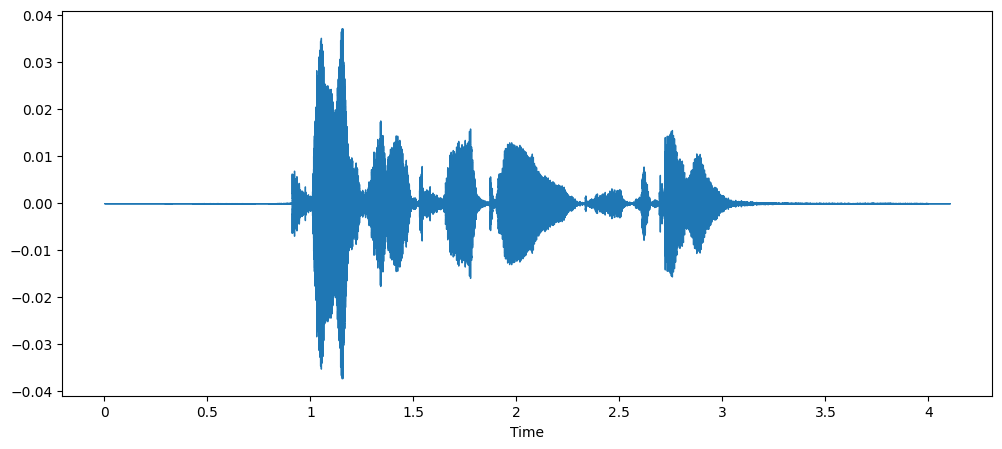

In [17]:
# SHIFTED AUDIO
x = shift(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

In [18]:
# PREPROCESSING FUNCTIONS
def reduce_noise(y, sr):
    """Apply noise reduction using spectral gating."""
    # Generate a noise profile
    noise_profile = librosa.effects.trim(y, top_db=30)[0]
    # Subtract noise from the signal
    return librosa.effects.preemphasis(y)

def segment_audio(y, sr, duration=2.5, offset=0.6):
    """Segment the audio into a fixed duration."""
    return librosa.util.fix_length(y[int(offset * sr):int((offset + duration) * sr)], size=int(duration * sr))


In [19]:
# FEATURE EXTRACTION FUNCTIONS
def extract_features(data, sr):
    """Extract MFCC, Chroma, and Contrast features from audio data."""
    result = np.array([])
    # MFCC
    mfccs = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=40)
    result = np.hstack((result, np.mean(mfccs, axis=1)))
    # Chroma
    chroma = librosa.feature.chroma_stft(y=data, sr=sr)
    result = np.hstack((result, np.mean(chroma, axis=1)))
    # Contrast
    contrast = librosa.feature.spectral_contrast(y=data, sr=sr)
    result = np.hstack((result, np.mean(contrast, axis=1)))
    return result

def get_features(path, duration=2.5, offset=0.6):
    """Extract features from a single audio file."""
    data, sr = librosa.load(path, duration=duration, offset=offset)
    features = extract_features(data, sr)
    return features

In [20]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
from tqdm import tqdm
from joblib import Parallel, delayed
import timeit
import warnings

warnings.filterwarnings("ignore")


In [21]:
# PROCESSING THE DATASET
start = timeit.default_timer()

X, Y = [], []
for path, emotion in tqdm(zip(ravdess_df.Path, ravdess_df.Emotions), total=ravdess_df.shape[0]):
    features = get_features(path)
    X.append(features)
    Y.append(emotion)

stop = timeit.default_timer()
print(f'Time: {stop - start} seconds')

100%|██████████| 1440/1440 [10:53<00:00,  2.20it/s]

Time: 653.1799890269999 seconds


In [22]:
# SAVE FEATURES
features_df = pd.DataFrame(X)
features_df['Emotion'] = Y
features_df.to_csv('ravdess_features_40mfcc_with_prep.csv', index=False)

print(features_df.head())

            0          1          2         3          4          5  \
0 -599.663330  67.372040  -4.040370  5.120863  -7.726656 -11.448706   
1 -430.729614  43.701031 -31.506357  2.789495 -17.773390 -22.831856   
2 -614.941528  59.253983 -19.018417  2.036468 -12.449547 -14.476855   
3 -584.076111  58.189289 -17.256704  0.845687 -10.024159 -12.321336   
4 -610.638428  54.867096  -8.389924  5.081679 -11.796437  -7.454585   

           6          7          8         9  ...        50        51  \
0 -18.646805 -10.855432 -14.355961 -8.283329  ...  0.433072  0.424818   
1 -18.790672 -17.308323 -17.343056 -4.768863  ...  0.369138  0.367863   
2 -15.014793 -18.926950 -11.564497 -7.966040  ...  0.504122  0.465230   
3 -13.251030 -11.982508 -13.465327 -9.047194  ...  0.457171  0.426518   
4 -21.059792 -17.067659 -10.806254 -8.350957  ...  0.561431  0.479877   

          52         53         54         55         56         57  \
0  19.241024  18.183205  19.604461  16.859819  17.692421  16.90

In [24]:
Emotions = pd.read_csv('/content/ravdess_features_40mfcc_with_prep.csv')
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,Emotion
0,-599.663330,67.372040,-4.040370,5.120863,-7.726656,-11.448706,-18.646805,-10.855432,-14.355961,-8.283329,...,0.433072,0.424818,19.241024,18.183205,19.604461,16.859819,17.692421,16.902498,43.826645,sad
1,-430.729614,43.701031,-31.506357,2.789495,-17.773390,-22.831856,-18.790672,-17.308323,-17.343056,-4.768863,...,0.369138,0.367863,14.235490,23.503269,21.358611,20.157713,20.122829,21.046088,46.804423,happy
2,-614.941528,59.253983,-19.018417,2.036468,-12.449547,-14.476855,-15.014793,-18.926950,-11.564497,-7.966040,...,0.504122,0.465230,16.994544,16.723461,19.539422,16.436377,17.446485,17.663216,45.032576,neutral
3,-584.076111,58.189289,-17.256704,0.845687,-10.024159,-12.321336,-13.251030,-11.982508,-13.465327,-9.047194,...,0.457171,0.426518,16.697898,18.300102,18.731215,17.786562,18.484927,17.930939,46.039095,happy
4,-610.638428,54.867096,-8.389924,5.081679,-11.796437,-7.454585,-21.059792,-17.067659,-10.806254,-8.350957,...,0.561431,0.479877,16.766064,18.410340,21.186960,17.788389,18.633279,17.931911,44.712605,neutral


In [25]:
print(Emotions.isna().any())

0          False
1          False
2          False
3          False
4          False
5          False
6          False
7          False
8          False
9          False
10         False
11         False
12         False
13         False
14         False
15         False
16         False
17         False
18         False
19         False
20         False
21         False
22         False
23         False
24         False
25         False
26         False
27         False
28         False
29         False
30         False
31         False
32         False
33         False
34         False
35         False
36         False
37         False
38         False
39         False
40         False
41         False
42         False
43         False
44         False
45         False
46         False
47         False
48         False
49         False
50         False
51         False
52         False
53         False
54         False
55         False
56         False
57         False
58         Fal

In [26]:
Emotions=Emotions.fillna(0)
print(Emotions.isna().any())
Emotions.shape
np.sum(Emotions.isna())

0          False
1          False
2          False
3          False
4          False
5          False
6          False
7          False
8          False
9          False
10         False
11         False
12         False
13         False
14         False
15         False
16         False
17         False
18         False
19         False
20         False
21         False
22         False
23         False
24         False
25         False
26         False
27         False
28         False
29         False
30         False
31         False
32         False
33         False
34         False
35         False
36         False
37         False
38         False
39         False
40         False
41         False
42         False
43         False
44         False
45         False
46         False
47         False
48         False
49         False
50         False
51         False
52         False
53         False
54         False
55         False
56         False
57         False
58         Fal

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [30]:
X = Emotions.iloc[:, :-1].values
Y = Emotions.iloc[:, -1].values


In [29]:
print(Emotions.columns)


Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', 'Emotion'],
      dtype='object')


In [31]:
# As this is a multiclass classification problem onehotencoding our Y
from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [32]:
print(Y.shape)
X.shape

(1440, 7)


(1440, 59)

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42,test_size=0.2, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1152, 59), (1152, 7), (288, 59), (288, 7))

In [34]:
#reshape for lstm
X_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)

In [35]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1152, 59), (1152, 7), (288, 59), (288, 7))

In [36]:
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD

In [39]:
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
model_checkpoint = ModelCheckpoint('best_model1.weights.h5', monitor='val_accuracy', save_best_only=True, save_weights_only=True)


In [40]:
early_stop=EarlyStopping(monitor='val_acc',mode='auto',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

In [45]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

model01 = Sequential()

# Adding LSTM layers with appropriate return_sequences settings for stacking
model01.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model01.add(Dropout(0.2))

model01.add(LSTM(128, return_sequences=True))
model01.add(Dropout(0.2))

model01.add(LSTM(128, return_sequences=True))
model01.add(Dropout(0.2))

# Adding a final LSTM layer without return_sequences as it will feed into a Dense layer
model01.add(LSTM(128))
model01.add(Dropout(0.3))

# Output layer with 7 units for classification
model01.add(Dense(7, activation='softmax'))

# Compile the model
model01.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the model summary
model01.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 59, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 59, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 59, 128)             │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 59, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 59, 128)             │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 59, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 462,215 (1.76 MB)

 Trainable params: 462,215 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
# Training the model
hist = model01.fit(X_train, y_train,
                   epochs=1000,               # Set the number of epochs to train
                   validation_data=(X_test, y_test),  # Validation data to evaluate the model after each epoch
                   batch_size=64,           # Batch size for training
                   verbose=1,               # Display training progress
                   callbacks=[model_checkpoint])  # Optional: Add any callbacks like ModelCheckpoint



Epoch 1/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5100 - loss: 1.2827 - val_accuracy: 0.3438 - val_loss: 1.6510
Epoch 2/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4643 - loss: 1.3642 - val_accuracy: 0.3924 - val_loss: 1.5741
Epoch 3/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5125 - loss: 1.3316 - val_accuracy: 0.4062 - val_loss: 1.5769
Epoch 4/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5398 - loss: 1.2258 - val_accuracy: 0.4062 - val_loss: 1.6025
Epoch 5/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4864 - loss: 1.3192 - val_accuracy: 0.3889 - val_loss: 1.6183
Epoch 6/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5139 - loss: 1.2708 - val_accuracy: 0.4236 - val_loss: 1.5488
Epoch 7/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5279 - loss: 1.2661 - val_accuracy: 0.3715 - val_loss: 1.6013
Epoch 8/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5125 - loss: 1.2700 - val_accu

In [54]:
# Print final accuracy and loss
print("Training Loss:", hist.history['loss'][-1])
print("Training Accuracy:", hist.history['accuracy'][-1])
print("Validation Loss:", hist.history['val_loss'][-1])
print("Validation Accuracy:", hist.history['val_accuracy'][-1])

Training Loss: 0.05314856022596359
Training Accuracy: 0.9852430820465088
Validation Loss: 3.0983641147613525
Validation Accuracy: 0.4756944477558136
